## Cleaning and Plotting Data on OpenAI's Usage and Finances

### Data source: https://epoch.ai/data/ai-companies?view=table

**Part One: Importing the Data from Epoch**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

ai_companies_url = 'https://epoch.ai/data/ai_companies.csv'
ai_companies_df = pd.read_csv(ai_companies_url)

compute_spend_url = 'https://epoch.ai/data/ai_companies_compute_spend.csv'
compute_spend_df = pd.read_csv(compute_spend_url) 

funding_rounds_url = 'https://epoch.ai/data/ai_companies_funding_rounds.csv'
funding_rounds_df = pd.read_csv(funding_rounds_url) 

staff_reports_url = 'https://epoch.ai/data/ai_companies_staff_reports.csv'
staff_reports_df = pd.read_csv(staff_reports_url)  

revenue_reports_url = 'https://epoch.ai/data/ai_companies_revenue_reports.csv'
revenue_reports_df = pd.read_csv(revenue_reports_url) 

usage_reports_url = 'https://epoch.ai/data/ai_companies_usage_reports.csv'
usage_reports_df = pd.read_csv(usage_reports_url) 


**Part Two: Cleaning and organizing the spending, revenue, and usage data frames**

In [2]:
compute_spend_openai = compute_spend_df[compute_spend_df['Company'] == 'OpenAI']

In [3]:
revenue_reports_openai = revenue_reports_df[revenue_reports_df['Company'] == 'OpenAI']

In [4]:
spendcols = ['Company', 'Amount', 'Date']

In [5]:
spend_openai = compute_spend_openai[spendcols]

In [6]:
spend_openai = spend_openai.rename(columns={'Amount': 'Spending Amount'})

In [7]:
spend_openai.head()

,Company,Spending Amount,Date
0,OpenAI,416000000,2022-12-31
3,OpenAI,1800000000,2024-12-31
4,OpenAI,4000000000,2024-12-31
7,OpenAI,9000000000,2025-12-31
8,OpenAI,16000000000,2025-12-31


In [8]:
spend_data = spend_openai.copy()
spend_data['Date'] = pd.to_datetime(spend_data['Date'])
spend_data = spend_data.rename(columns={'Date': 'date'})

In [9]:
spend_data.head()

,Company,Spending Amount,date
0,OpenAI,416000000,2022-12-31
3,OpenAI,1800000000,2024-12-31
4,OpenAI,4000000000,2024-12-31
7,OpenAI,9000000000,2025-12-31
8,OpenAI,16000000000,2025-12-31


In [10]:
revcols = ['Company', 'Revenue amount (normalize to annual)', 'Date']

In [11]:
rev_openai = revenue_reports_openai[revcols]

In [12]:
rev_openai = rev_openai.rename(columns={'Revenue amount (normalize to annual)': 'Revenue Amount'})

In [13]:
rev_data = rev_openai.copy()
rev_data['Date'] = pd.to_datetime(rev_data['Date'])
rev_data = rev_data.rename(columns={'Date': 'date'})

In [14]:
rev_data.head()

,Company,Revenue Amount,date
1,OpenAI,2.800000e+07,2022-12-31
2,OpenAI,2.000000e+08,2023-03-01
3,OpenAI,1.000000e+09,2023-08-29
5,OpenAI,1.300000e+09,2023-10-10
6,OpenAI,1.600000e+09,2023-12-30


In [15]:
usagecols = ['Company', 'Active users', 'Active users time period', 'Date']

In [16]:
usage_cols = usage_reports_df[usagecols]

In [17]:
usage_openai = usage_cols[usage_cols['Company'] == 'OpenAI']

In [18]:
usage_openai_cleaned = usage_openai.dropna().copy()
usage_openai_cleaned.loc[:, 'Date'] = pd.to_datetime(usage_openai_cleaned['Date'])

In [19]:
usage_openai_cleaned.tail()

,Company,Active users,Active users time period,Date
18,OpenAI,160000000.0,Daily,2025-03-28 00:00:00
29,OpenAI,770000000.0,Weekly,2025-07-15 00:00:00
32,OpenAI,700000000.0,Weekly,2025-08-04 00:00:00
36,OpenAI,800000000.0,Weekly,2025-10-06 00:00:00
39,OpenAI,40000000.0,Weekly,2025-10-14 00:00:00


**Part Three: Exploratory Data Analysis; Creating Plots of OpenAI's Usage Over Time; Comparing OpenAI's Spending vs Revenue**

In [20]:
usage_openai_cleaned = usage_openai_cleaned.iloc[:-1]

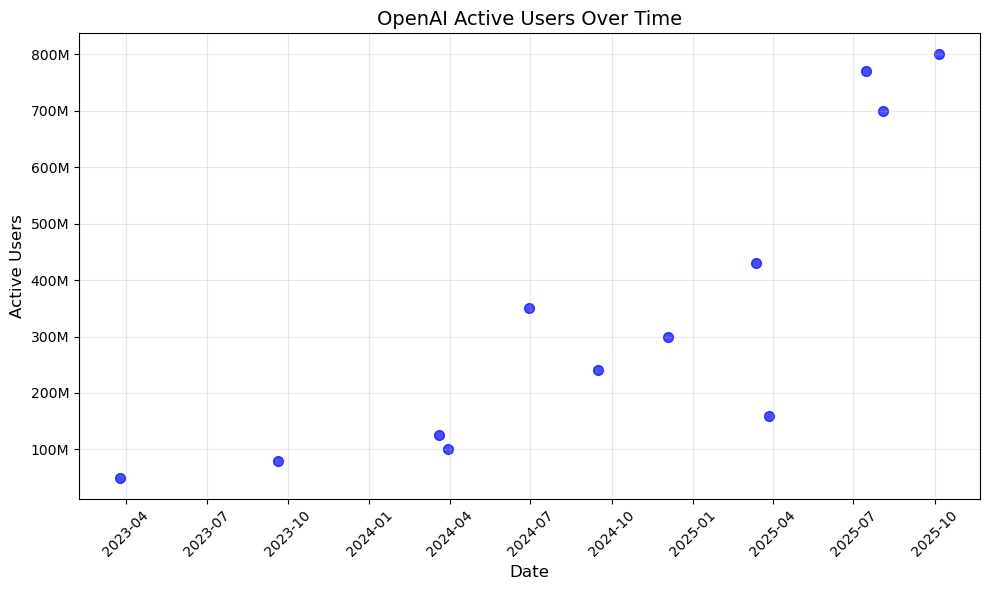

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(usage_openai_cleaned['Date'], usage_openai_cleaned['Active users'], 
           color='blue', s=50, alpha=0.7)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Active Users', fontsize=12)
ax.set_title('OpenAI Active Users Over Time', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

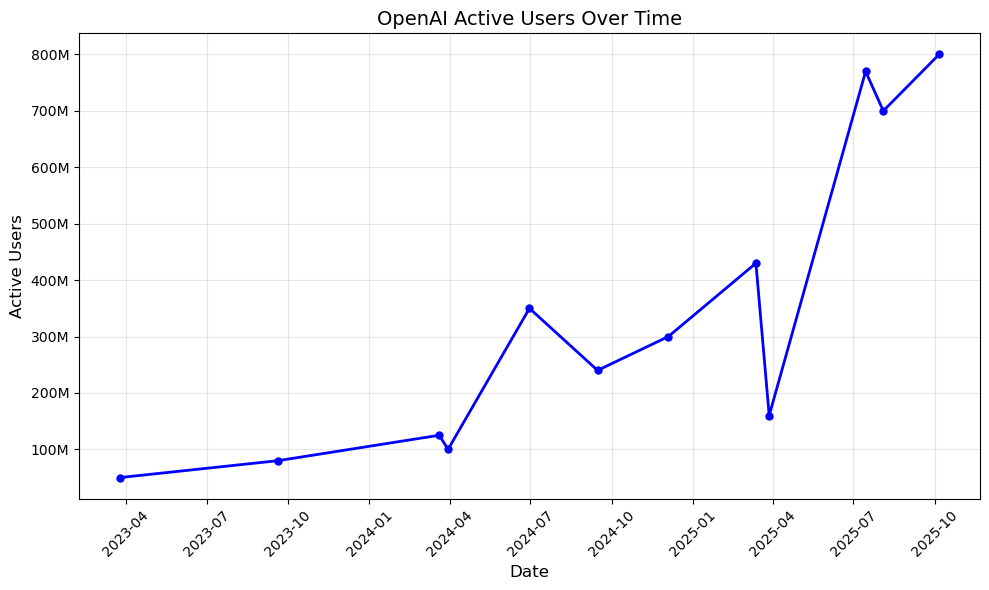

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(usage_openai_cleaned['Date'], usage_openai_cleaned['Active users'], 
        color='blue', linewidth=2, marker='o', markersize=5)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Active Users', fontsize=12)
ax.set_title('OpenAI Active Users Over Time', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

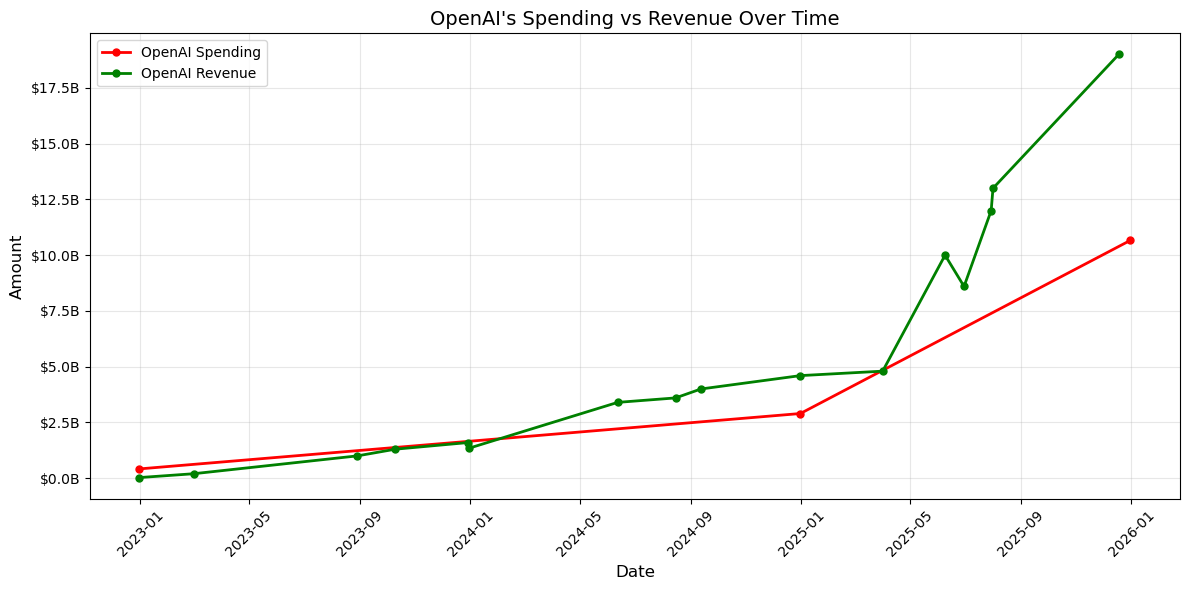

In [29]:
spend_cleaned = spend_data.copy()
spend_cleaned['date'] = pd.to_datetime(spend_cleaned['date'])

spend_cleaned = spend_cleaned.groupby('date')['Spending Amount'].mean().reset_index()
spend_cleaned = spend_cleaned.sort_values('date')

rev_cleaned = rev_data.copy()
rev_cleaned = rev_data.drop(rev_data.index[-2])
rev_cleaned['date'] = pd.to_datetime(rev_cleaned['date'])
rev_cleaned = rev_cleaned.groupby('date')['Revenue Amount'].mean().reset_index()
rev_cleaned = rev_cleaned.sort_values('date')

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(spend_cleaned['date'], spend_cleaned['Spending Amount'], 
        label='OpenAI Spending', linewidth=2, marker='o', markersize=5, color='red')
ax.plot(rev_cleaned['date'], rev_cleaned['Revenue Amount'], 
        label='OpenAI Revenue', linewidth=2, marker='o', markersize=5, color='green')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e9:.1f}B'))

plt.title("OpenAI's Spending vs Revenue Over Time", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()